# Juan Felipe Osorio Franco


# Ejercicio

1. Consulte y presente el modelo y problema de optimización de los siguientes clasificadores:

- [Naive_Bayes.GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)
- [SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)
- [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [LinearDiscriminantAnalysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)
- [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
- [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)
- [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
- [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

2. Utilizando un esquema de validación cruzada de 5 folds sobre el conjunto de entrenamiento, compare el rendimiento de los métodos del punto 1 en términos de validación cruzada con gridserachCV y en el conjunto de test (30% de los datos originales), fijando el score del gridsearch en términos del acc y el f1. Justifique los hiperparámetros a buscar y la rejilla de valores escogida para cada algoritmo según los modelos estudiados en clase y las respuestas del punto 1.


# 1. Modelos y problemas de optimización

A continuación, se presenta una breve descripción de cada uno de los clasificadores solicitados, incluyendo su modelo y problema de optimización.

### a) Naive_Bayes.GaussianNB

**Modelo:**

El clasificador Naive Bayes Gaussiano asume que las características siguen una distribución normal (gaussiana). Es un modelo probabilístico que aplica el teorema de Bayes con la suposición "ingenua" de independencia entre las características.

**Problema de optimización:**

No requiere un proceso iterativo de optimización. Calcula directamente las probabilidades a priori y la media y varianza de cada característica para cada clase, utilizando estimaciones MLE (Máxima Verosimilitud).

Clasificación: 

$$\hat{C} = \underset{k}{\operatorname{argmax}} \ P(C_k) \prod_{i=1}^{n} P(x_i | C_k)$$

Distribución Gaussiana (Naive Bayes Gaussiano): 

$$P(x_i | C_k) = \frac{1}{\sqrt{2\pi \sigma_{C_k}^2}} \exp \left( -\frac{(x_i - \mu_{C_k})^2}{2\sigma_{C_k}^2} \right)$$

### b) SGDClassifier

**Modelo:**

El `SGDClassifier` implementa un modelo lineal (regresión logística, SVM lineal, etc.) entrenado con Descenso de Gradiente Estocástico (SGD). Es útil para grandes conjuntos de datos.

**Problema de optimización:**

Minimiza una función de pérdida convexa (como la pérdida logarítmica para regresión logística o la pérdida hinge para SVM) con regularización (L1, L2 o Elastic Net):

$$
\min_{w} \frac{1}{n} \sum_{i=1}^{n} L(y_i, w^T x_i) + \lambda R(w)
$$

Donde $L$ es la función de pérdida y $R(w)$ es el término de regularización.

### c) LogisticRegression

**Modelo:**

La Regresión Logística es un modelo lineal que utiliza la función sigmoide para modelar la probabilidad de pertenencia a una clase.

**Problema de optimización:**

Minimiza la pérdida logarítmica (log-loss) con regularización:

$$
\min_{w} - \sum_{i=1}^{n} [y_i \log(p_i) + (1 - y_i) \log(1 - p_i)] + \lambda R(w)
$$

Donde $p_i = \sigma(w^T x_i)$ y $R(w)$ es el término de regularización (L1 o L2).

### d) LinearDiscriminantAnalysis

**Modelo:**

El Análisis Discriminante Lineal (LDA) asume que las clases tienen distribuciones gaussianas con igual matriz de covarianza. Busca proyectar los datos en una línea que maximiza la separabilidad entre clases.

**Problema de optimización:**

Maximiza la razón de varianza entre clases a varianza dentro de las clases:

$$
\max_{w} \frac{w^T S_B w}{w^T S_W w}
$$

Donde $S_B$ es la matriz de dispersión entre clases y $S_W$ es la matriz de dispersión dentro de las clases.

### e) KNeighborsClassifier

**Modelo:**

El clasificador de K Vecinos Más Cercanos asigna a un punto la clase más común entre sus K vecinos más cercanos en el espacio de características.

**Problema de optimización:**

No tiene un problema de optimización en el entrenamiento. Durante la predicción, calcula distancias y encuentra los K vecinos más cercanos.

### f) LinearSVC

**Modelo:**

Implementa una Máquina de Vectores de Soporte (SVM) lineal utilizando el solucionador de `liblinear`.

**Problema de optimización:**

Resuelve el problema de optimización:

$$
\min_{w, \xi} \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{n} \xi_i
$$

Sujeto a:

$$
y_i (w^T x_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0
$$

Donde $\xi_i$ son las variables de holgura y $C$ es el parámetro de penalización.

### g) SVC

**Modelo:**

Implementa una SVM con posibilidad de utilizar núcleos no lineales (por defecto, kernel RBF).

**Problema de optimización:**

Similar al de LinearSVC, pero en un espacio de características transformado mediante el kernel:

$$
\min_{w, \xi} \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{n} \xi_i
$$

Sujeto a:

$$
y_i (w^T \phi(x_i) + b) \geq 1 - \xi_i, \quad \xi_i \geq 0
$$

Donde $\phi(x)$ es la transformación del kernel.

### h) RandomForestClassifier

**Modelo:**

Es un conjunto de árboles de decisión entrenados sobre diferentes subconjuntos del conjunto de datos. Utiliza la agregación de bootstrap y el muestreo aleatorio de características.

**Problema de optimización:**

Cada árbol se entrena mediante particiones que maximizan la ganancia de información o reducen la impureza (por ejemplo, criterio Gini). No hay un problema de optimización global; el modelo se beneficia de la agregación de múltiples estimadores.



# 2. Comparación de métodos utilizando validación cruzada y GridSearchCV

A continuación, implementamos el código para comparar los clasificadores mencionados utilizando validación cruzada de 5 folds y GridSearchCV. Justificamos los hiperparámetros seleccionados y los valores de la rejilla.

### Justificación de hiperparámetros y rejilla

Para cada modelo, seleccionamos hiperparámetros clave que afectan significativamente el rendimiento:

- **Naive Bayes**: No tiene hiperparámetros ajustables significativos, pero podemos considerar la varianza de Laplace (`var_smoothing`).
- **SGDClassifier**: Ajustamos la tasa de aprendizaje (`alpha`) y la función de pérdida (`loss`).
- **LogisticRegression**: Ajustamos el parámetro de regularización inversa (`C`) y la norma de regularización (`penalty`).
- **LinearDiscriminantAnalysis**: Podemos ajustar el parámetro de regularización (`shrinkage`) y el solver.
- **KNeighborsClassifier**: Ajustamos el número de vecinos (`n_neighbors`) y la métrica de distancia (`metric`).
- **LinearSVC**: Ajustamos el parámetro de penalización (`C`) y la pérdida (`loss`).
- **SVC**: Ajustamos `C` y el parámetro del kernel RBF (`gamma`).
- **RandomForestClassifier**: Ajustamos el número de estimadores (`n_estimators`) y la profundidad máxima del árbol (`max_depth`).


In [1]:
# Librerías necesarias
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, label_binarize
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Crear carpeta de resultados
if not os.path.exists('results'):
    os.mkdir('results')

# Lectura de la base de datos LFW
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
Xdata = pd.DataFrame(lfw_people.data) / 255.0
y = lfw_people.target

# Partición en conjunto de entrenamiento y prueba
Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, y, test_size=0.3, random_state=123)


In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier

# Definir pipelines y parámetros
pipelines = []
parameters = []
labels = []

# Naive Bayes
pipelines.append(Pipeline([('scaler', MinMaxScaler()), ('clf', GaussianNB())]))
parameters.append({
    'clf__var_smoothing': np.logspace(0, -9, num=10)
})
labels.append('GaussianNB')

# SGDClassifier
pipelines.append(Pipeline([('scaler', StandardScaler()), ('clf', SGDClassifier(random_state=123))]))
parameters.append({
    'clf__loss': ['hinge', 'log'],
    'clf__alpha': [1e-4, 1e-3, 1e-2],
    'clf__penalty': ['l2', 'l1', 'elasticnet']
})
labels.append('SGDClassifier')

# Logistic Regression
pipelines.append(Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression(max_iter=1000, random_state=123))]))
parameters.append({
    'clf__C': [0.01, 0.1, 1, 10],
    'clf__penalty': ['l2', 'l1'],
    'clf__solver': ['liblinear']
})
labels.append('LogisticRegression')

# Linear Discriminant Analysis
pipelines.append(Pipeline([('scaler', StandardScaler()), ('clf', LinearDiscriminantAnalysis())]))
parameters.append({
    'clf__solver': ['svd', 'lsqr', 'eigen'],
    'clf__shrinkage': [None, 'auto'] + list(np.linspace(0.0, 1.0, num=5))
})
labels.append('LinearDiscriminantAnalysis')

# KNeighborsClassifier
pipelines.append(Pipeline([('scaler', StandardScaler()), ('clf', KNeighborsClassifier())]))
parameters.append({
    'clf__n_neighbors': [3, 5, 7],
    'clf__metric': ['euclidean', 'manhattan', 'minkowski']
})
labels.append('KNeighborsClassifier')

# LinearSVC
pipelines.append(Pipeline([('scaler', StandardScaler()), ('clf', LinearSVC(max_iter=10000, random_state=123))]))
parameters.append({
    'clf__C': [0.01, 0.1, 1, 10],
    'clf__loss': ['hinge', 'squared_hinge']
})
labels.append('LinearSVC')

# SVC
pipelines.append(Pipeline([('scaler', StandardScaler()), ('clf', SVC(random_state=123))]))
parameters.append({
    'clf__C': [0.1, 1, 10],
    'clf__gamma': [1e-3, 1e-2, 1e-1],
    'clf__kernel': ['rbf']
})
labels.append('SVC')

# RandomForestClassifier
pipelines.append(Pipeline([('clf', RandomForestClassifier(random_state=123))]))
parameters.append({
    'clf__n_estimators': [50, 100, 200],
    'clf__max_depth': [None, 10, 20],
    'clf__max_features': ['auto', 'sqrt']
})
labels.append('RandomForestClassifier')


In [3]:
from sklearn.model_selection import StratifiedKFold
import joblib

models = []
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

for i in range(len(pipelines)):
    print(f"Entrenando modelo {labels[i]} ({i+1}/{len(pipelines)})")
    grid_search = GridSearchCV(pipelines[i], parameters[i], n_jobs=-1, cv=cv, scoring=['accuracy', 'f1_macro'], refit='accuracy', verbose=1)
    grid_search.fit(Xtrain, ytrain)
    models.append(grid_search)
    # Guardar el modelo
    joblib.dump(models, 'results/lfw_models.pkl')


Entrenando modelo GaussianNB (1/8)
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Entrenando modelo SGDClassifier (2/8)
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Entrenando modelo LogisticRegression (3/8)
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Entrenando modelo LinearDiscriminantAnalysis (4/8)
Fitting 5 folds for each of 21 candidates, totalling 105 fits
Entrenando modelo KNeighborsClassifier (5/8)
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Entrenando modelo LinearSVC (6/8)
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Entrenando modelo SVC (7/8)
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Entrenando modelo RandomForestClassifier (8/8)
Fitting 5 folds for each of 18 candidates, totalling 90 fits



Modelo: GaussianNB
Mejores hiperparámetros: {'clf__var_smoothing': 0.01}
Mejor score en validación cruzada (accuracy): 0.3629
Accuracy en test: 0.4083
F1-score en test: 0.4224


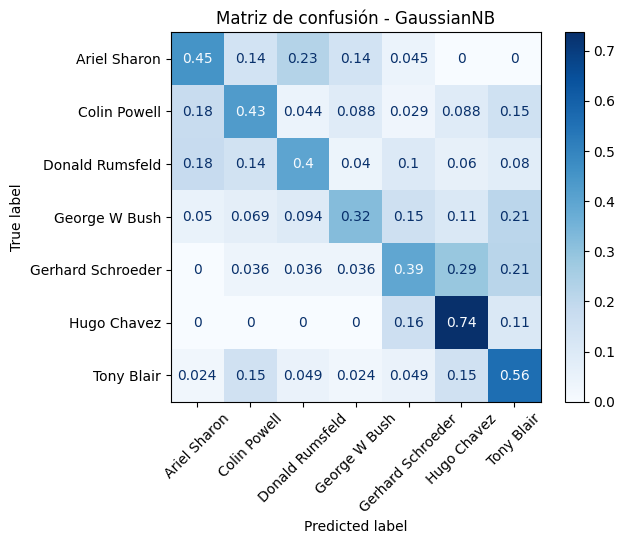


Modelo: SGDClassifier
Mejores hiperparámetros: {'clf__alpha': 0.0001, 'clf__loss': 'hinge', 'clf__penalty': 'l2'}
Mejor score en validación cruzada (accuracy): 0.7936
Accuracy en test: 0.8243
F1-score en test: 0.8173


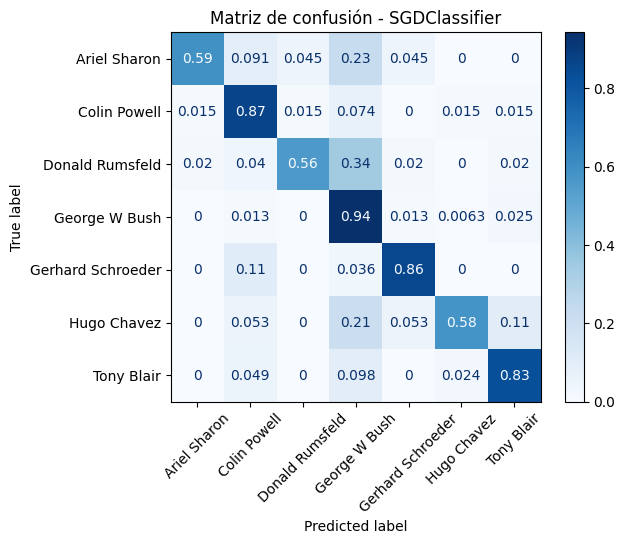


Modelo: LogisticRegression
Mejores hiperparámetros: {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Mejor score en validación cruzada (accuracy): 0.8047
Accuracy en test: 0.8295
F1-score en test: 0.8277


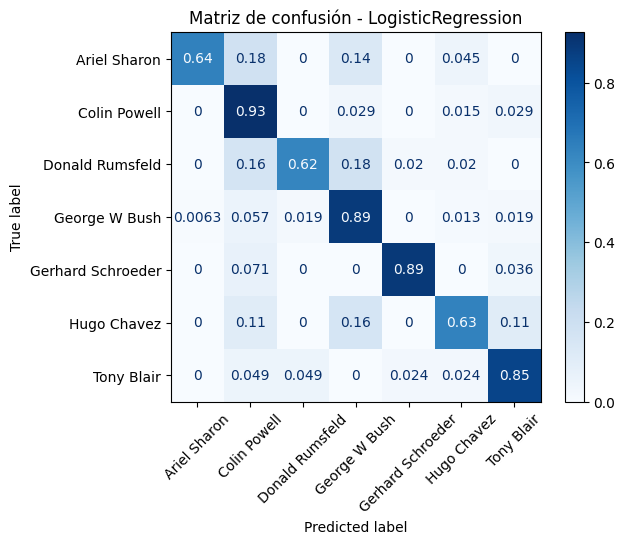


Modelo: LinearDiscriminantAnalysis
Mejores hiperparámetros: {'clf__shrinkage': 0.5, 'clf__solver': 'lsqr'}
Mejor score en validación cruzada (accuracy): 0.8424
Accuracy en test: 0.8656
F1-score en test: 0.8634


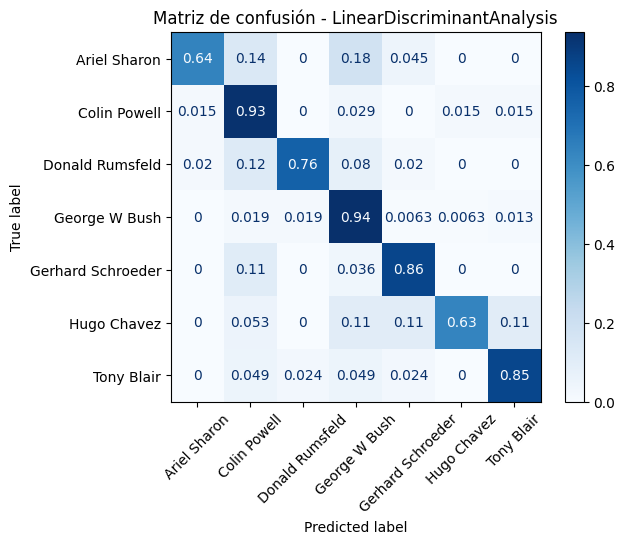


Modelo: KNeighborsClassifier
Mejores hiperparámetros: {'clf__metric': 'manhattan', 'clf__n_neighbors': 5}
Mejor score en validación cruzada (accuracy): 0.5982
Accuracy en test: 0.6382
F1-score en test: 0.6165


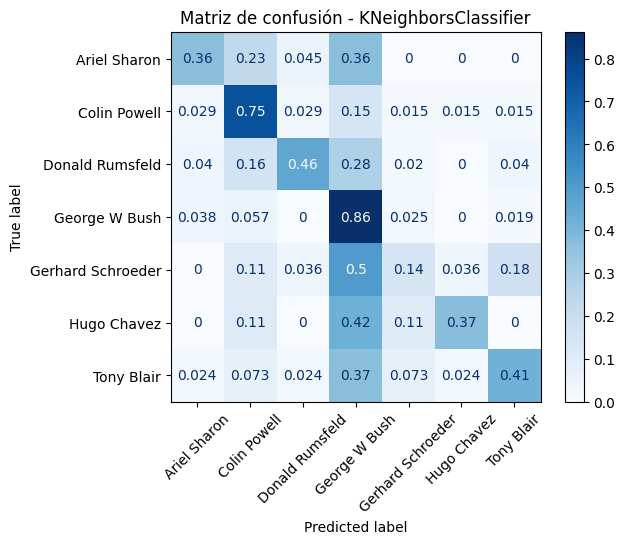


Modelo: LinearSVC
Mejores hiperparámetros: {'clf__C': 0.01, 'clf__loss': 'squared_hinge'}
Mejor score en validación cruzada (accuracy): 0.7991
Accuracy en test: 0.8140
F1-score en test: 0.8115


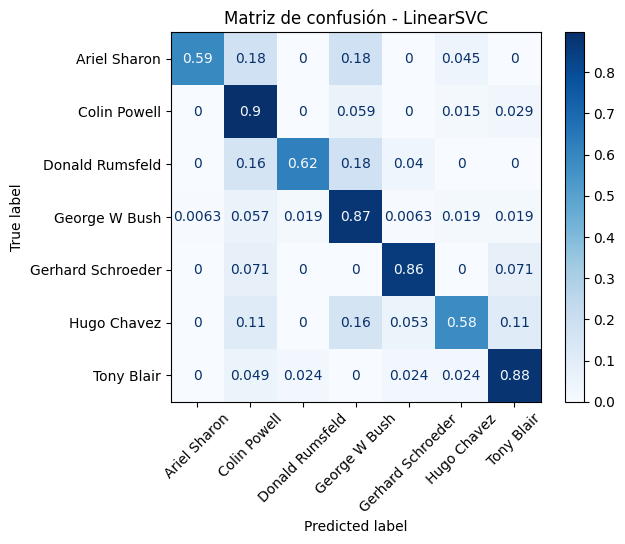


Modelo: SVC
Mejores hiperparámetros: {'clf__C': 10, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}
Mejor score en validación cruzada (accuracy): 0.7126
Accuracy en test: 0.7571
F1-score en test: 0.7387


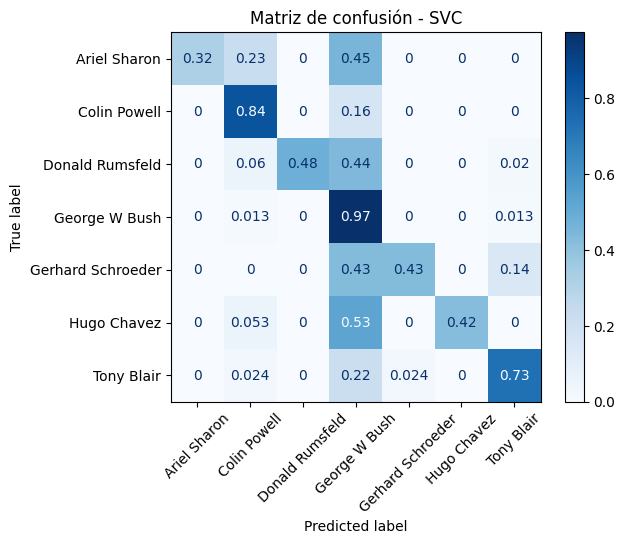


Modelo: RandomForestClassifier
Mejores hiperparámetros: {'clf__max_depth': None, 'clf__max_features': 'sqrt', 'clf__n_estimators': 100}
Mejor score en validación cruzada (accuracy): 0.6038
Accuracy en test: 0.6227
F1-score en test: 0.5633


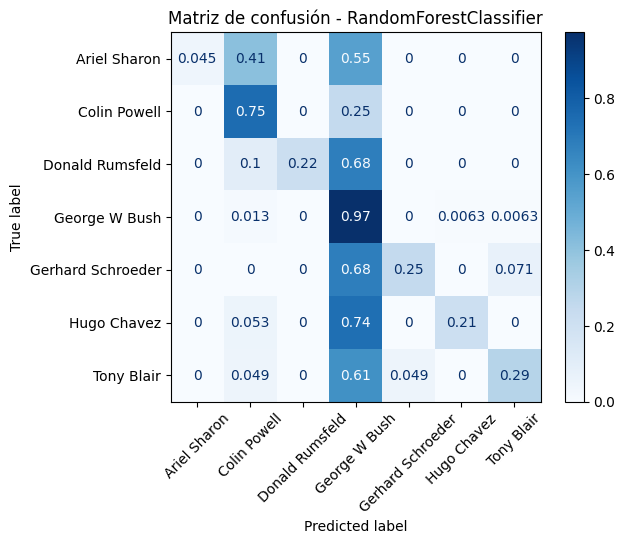

In [6]:
# Evaluación de los modelos
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for i in range(len(models)):
    print(f"\nModelo: {labels[i]}")
    print(f"Mejores hiperparámetros: {models[i].best_params_}")
    print(f"Mejor score en validación cruzada (accuracy): {models[i].best_score_:.4f}")

    # Evaluación en el conjunto de prueba
    y_pred = models[i].predict(Xtest)
    acc = accuracy_score(ytest, y_pred)
    f1 = classification_report(ytest, y_pred, target_names=lfw_people.target_names, output_dict=True)['weighted avg']['f1-score']
    print(f"Accuracy en test: {acc:.4f}")
    print(f"F1-score en test: {f1:.4f}")

    # Matriz de confusión
    cm = confusion_matrix(ytest, y_pred, normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lfw_people.target_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Matriz de confusión - {labels[i]}")
    plt.xticks(rotation=45)
    plt.show()


In [7]:
# Reporte de clasificación completo
for i in range(len(models)):
    print(f"\nModelo: {labels[i]}")
    y_pred = models[i].predict(Xtest)
    print(classification_report(ytest, y_pred, target_names=lfw_people.target_names))



Modelo: GaussianNB
                   precision    recall  f1-score   support

     Ariel Sharon       0.25      0.45      0.32        22
     Colin Powell       0.51      0.43      0.46        68
  Donald Rumsfeld       0.43      0.40      0.42        50
    George W Bush       0.80      0.32      0.46       159
Gerhard Schroeder       0.23      0.39      0.29        28
      Hugo Chavez       0.26      0.74      0.38        19
       Tony Blair       0.29      0.56      0.39        41

         accuracy                           0.41       387
        macro avg       0.40      0.47      0.39       387
     weighted avg       0.55      0.41      0.42       387


Modelo: SGDClassifier
                   precision    recall  f1-score   support

     Ariel Sharon       0.87      0.59      0.70        22
     Colin Powell       0.83      0.87      0.85        68
  Donald Rumsfeld       0.93      0.56      0.70        50
    George W Bush       0.81      0.94      0.87       159
Gerhard S


Curva ROC para el modelo: GaussianNB


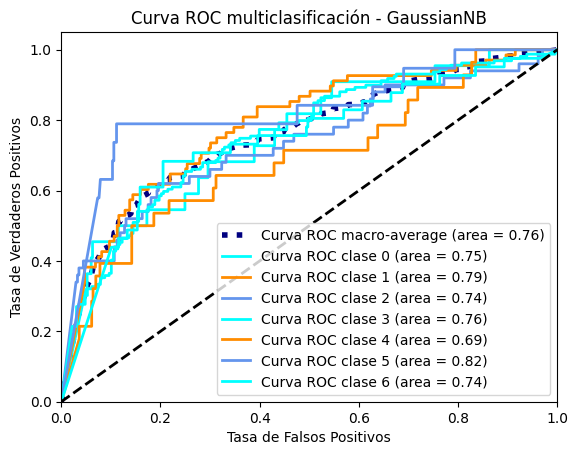


Curva ROC para el modelo: SGDClassifier


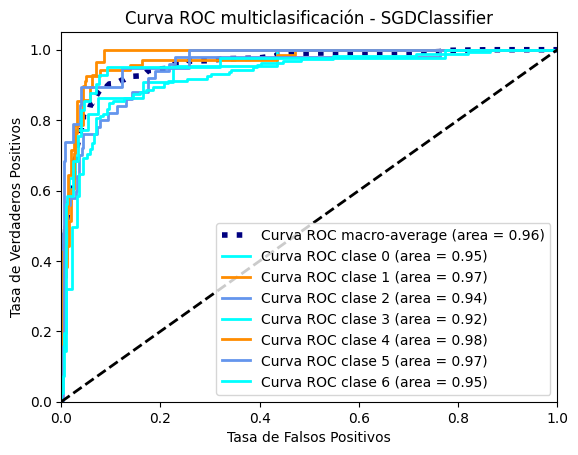


Curva ROC para el modelo: LogisticRegression


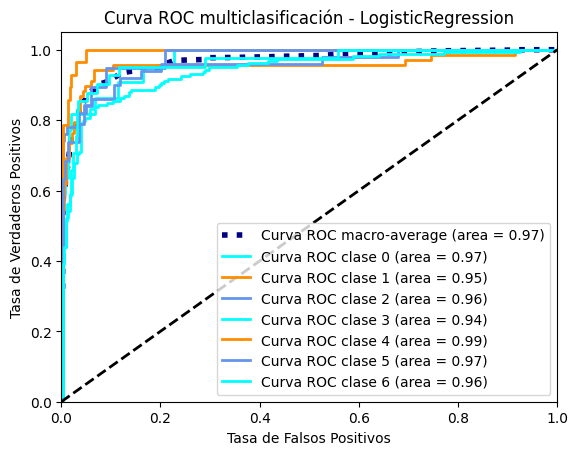


Curva ROC para el modelo: LinearDiscriminantAnalysis


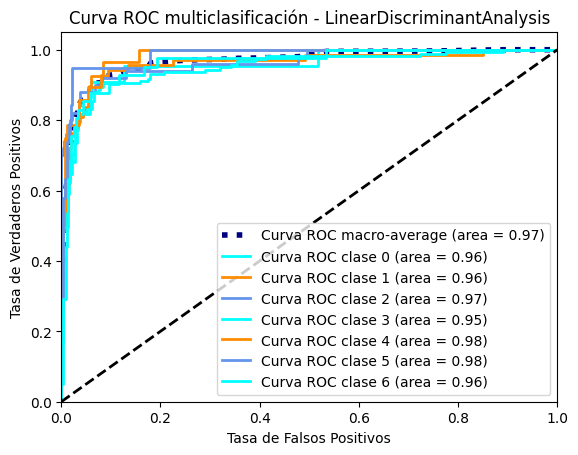


Curva ROC para el modelo: KNeighborsClassifier


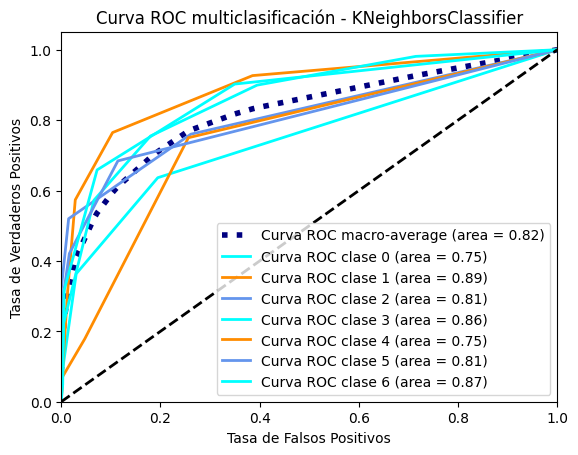


Curva ROC para el modelo: LinearSVC


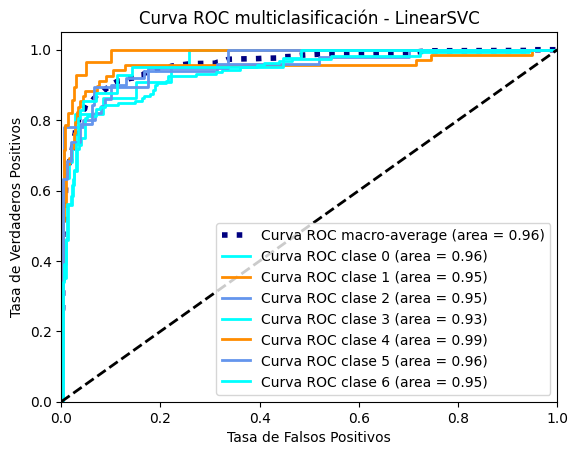


Curva ROC para el modelo: SVC


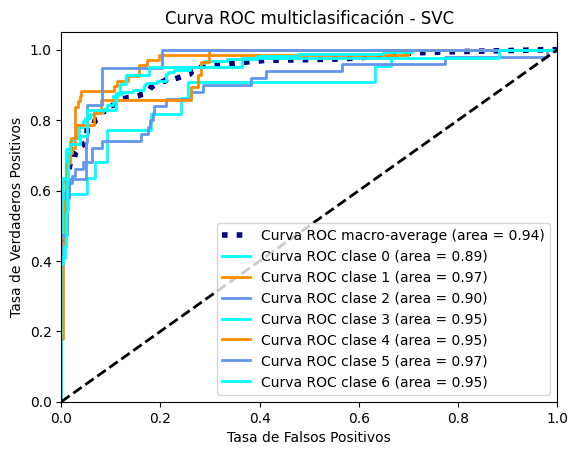


Curva ROC para el modelo: RandomForestClassifier


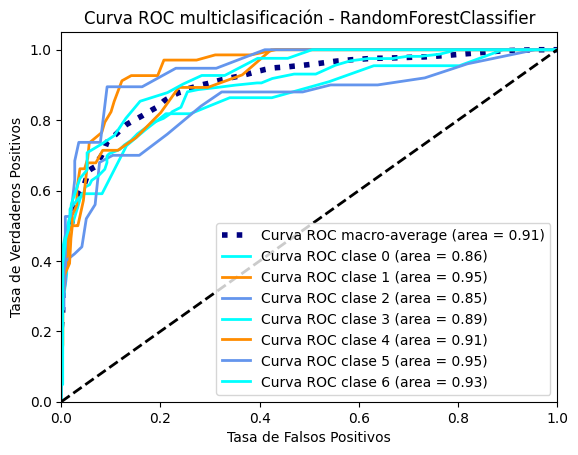

In [8]:
# Preparar etiquetas binarizadas para ROC
n_classes = len(lfw_people.target_names)
y_test_bin = label_binarize(ytest, classes=range(n_classes))

from sklearn.preprocessing import LabelBinarizer

for i in range(len(models)):
    print(f"\nCurva ROC para el modelo: {labels[i]}")
    # Obtener puntuaciones de decisión o probabilidades
    if hasattr(models[i], "decision_function"):
        y_score = models[i].decision_function(Xtest)
    else:
        y_score = models[i].predict_proba(Xtest)
    
    # Calcular ROC y AUC
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for j in range(n_classes):
        fpr[j], tpr[j], _ = roc_curve(y_test_bin[:, j], y_score[:, j])
        roc_auc[j] = auc(fpr[j], tpr[j])
    
    # Curva ROC promedio (macro)
    all_fpr = np.unique(np.concatenate([fpr[j] for j in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for j in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[j], tpr[j])
    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    # Graficar curva ROC
    plt.figure()
    plt.plot(fpr["macro"], tpr["macro"], label=f'Curva ROC macro-average (area = {roc_auc["macro"]:.2f})', color='navy', linestyle=':', linewidth=4)
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for j, color in zip(range(n_classes), colors):
        plt.plot(fpr[j], tpr[j], color=color, lw=2, label=f'Curva ROC clase {j} (area = {roc_auc[j]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title(f'Curva ROC multiclasificación - {labels[i]}')
    plt.legend(loc="lower right")
    plt.show()


In [9]:
results = []

for i in range(len(models)):
    acc = models[i].score(Xtest, ytest)
    y_pred = models[i].predict(Xtest)
    f1 = classification_report(ytest, y_pred, output_dict=True)['weighted avg']['f1-score']
    results.append({
        'Modelo': labels[i],
        'Accuracy': acc,
        'F1-score': f1,
        'Mejores parámetros': models[i].best_params_
    })

df_results = pd.DataFrame(results)
print(df_results)


                       Modelo  Accuracy  F1-score  \
0                  GaussianNB  0.408269  0.422352   
1               SGDClassifier  0.824289  0.817269   
2          LogisticRegression  0.829457  0.827683   
3  LinearDiscriminantAnalysis  0.865633  0.863396   
4        KNeighborsClassifier  0.638243  0.616451   
5                   LinearSVC  0.813953  0.811511   
6                         SVC  0.757106  0.738659   
7      RandomForestClassifier  0.622739  0.563350   

                                  Mejores parámetros  
0                       {'clf__var_smoothing': 0.01}  
1  {'clf__alpha': 0.0001, 'clf__loss': 'hinge', '...  
2  {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__so...  
3     {'clf__shrinkage': 0.5, 'clf__solver': 'lsqr'}  
4  {'clf__metric': 'manhattan', 'clf__n_neighbors...  
5     {'clf__C': 0.01, 'clf__loss': 'squared_hinge'}  
6  {'clf__C': 10, 'clf__gamma': 0.001, 'clf__kern...  
7  {'clf__max_depth': None, 'clf__max_features': ...  
